In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("balanced_tb_data.csv")

In [5]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [6]:
df1 = df.copy()

In [8]:
#df1.head()

In [4]:
df_test = pd.read_csv("solicited_test.csv")

In [9]:
df_test1 = df_test.copy()

In [11]:
#df_test1.head()

In [12]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [13]:
# Replace Yes/No/Not sure with 1/0 and Male/Female with 1/0
df_test.replace({
    'Yes': 1,
    'No': 0,
    'Not sure': 0,
    'Male': 1,
    'Female': 0
}, inplace=True)

In [14]:
df_test.drop(['participant', 'sound_prediction_score'], axis =1, inplace = True)

In [15]:
df.shape

(9800, 783)

In [16]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [17]:
df_test.shape

(9749, 782)

In [18]:
#df_test.isnull().sum()

# model building

In [19]:
# Step 1: Split df into train/validation
X = df.drop('tb_status', axis=1)
y = df['tb_status']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Step 2: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [22]:
# Step 3: Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Step 4: Validate on df
y_pred = logreg.predict(X_val_scaled)
y_prob = logreg.predict_proba(X_val_scaled)[:, 1]

In [24]:
# Step 5: Evaluation
print("🔍 Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\n ROC AUC Score:", roc_auc_score(y_val, y_prob))

🔍 Accuracy: 0.9984693877551021

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960


 Confusion Matrix:
 [[977   3]
 [  0 980]]

 ROC AUC Score: 0.999996876301541


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
# 1. Define clinical features only (exclude audio features)
clinical_features = [col for col in df.columns if not col.startswith('feat_') and col != 'tb_status']

In [27]:
# 2. Split features and target for train and test
X_train = df[clinical_features]
y_train = df['tb_status']


In [28]:
# 3. Prepare test features only (no y_test since 'tb_status' is missing)
X_test = df_test[clinical_features]


In [29]:
# 4. Scale the data
scaler = StandardScaler()
X_train_clinical_scaled = scaler.fit_transform(X_train)
X_test_clinical_scaled = scaler.transform(X_test)


In [30]:
# 5. Train logistic regression only on clinical features
logreg_clinical = LogisticRegression(max_iter=1000)
logreg_clinical.fit(X_train_clinical_scaled, y_train)


LogisticRegression(max_iter=1000)

In [31]:
# 6. Get feature importance
importance = pd.DataFrame({
    'feature': clinical_features,
    'importance': np.abs(logreg_clinical.coef_[0])
})

top5 = importance.sort_values(by='importance', ascending=False).head(5)

In [32]:
# 7. Print top 5 clinical features
print("\n🧬 Top 5 Most Important Clinical Features:\n", top5)


🧬 Top 5 Most Important Clinical Features:
          feature  importance
1            age    2.931125
3         weight    2.506558
10   weight_loss    1.682987
6   tb_prior_Pul    1.404852
13  night_sweats    1.368094


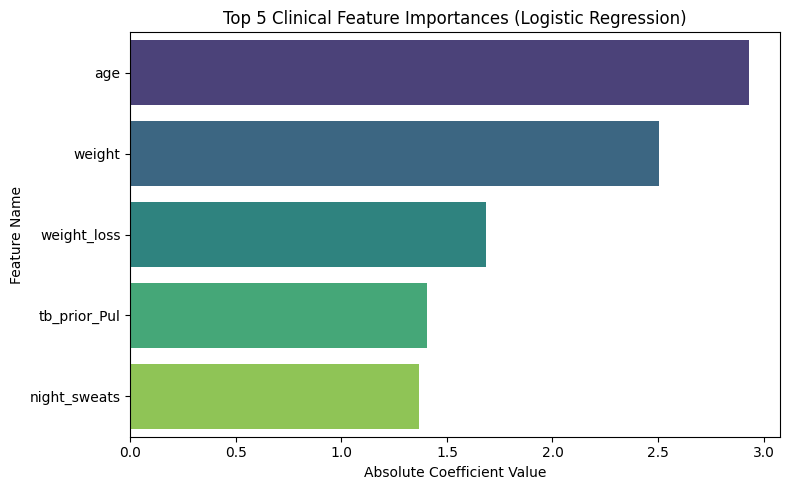

In [33]:
# 8. Plot the feature importances
plt.figure(figsize=(8, 5))
sns.barplot(data=top5, x='importance', y='feature', palette='viridis')
plt.title("Top 5 Clinical Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [34]:
# 9. Predict on test data (no evaluation since there's no ground truth)
y_pred = logreg_clinical.predict(X_test_clinical_scaled)
y_pred_proba = logreg_clinical.predict_proba(X_test_clinical_scaled)[:, 1]

# 10. Show a few predictions with probability
pred_df = df_test.copy()
pred_df['Predicted_TB_Status'] = y_pred
pred_df['TB_Probability'] = y_pred_proba

print("\n Sample predictions:\n", pred_df[['Predicted_TB_Status', 'TB_Probability']].head(50))


 Sample predictions:
     Predicted_TB_Status  TB_Probability
0                     0    2.066845e-09
1                     0    2.066845e-09
2                     0    2.066845e-09
3                     0    2.066845e-09
4                     0    9.069479e-06
5                     0    9.069479e-06
6                     0    9.069479e-06
7                     0    9.069479e-06
8                     0    1.582525e-01
9                     0    1.582525e-01
10                    0    1.582525e-01
11                    0    1.582525e-01
12                    0    1.582525e-01
13                    0    1.582525e-01
14                    0    1.582525e-01
15                    0    1.582525e-01
16                    0    1.582525e-01
17                    0    1.582525e-01
18                    0    1.582525e-01
19                    1    8.909212e-01
20                    1    8.909212e-01
21                    1    8.909212e-01
22                    1    8.909212e-01
23               

In [39]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [37]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_